In [1]:
!pip install category_encoders

!pip install xgboost

# 라이브러리

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from category_encoders import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import xgboost as xgb

In [2]:
seoul = pd.read_csv("seoul.csv")
seoul_park = pd.read_csv("seoul_park.csv")

In [3]:
seoul_park

,date,day,pay,free,daily_total,Unnamed: 5
0,2018-01-01,월,1688,628,2316,NaN
1,2018-01-02,화,403,585,988,NaN
2,2018-01-03,수,192,502,694,NaN
3,2018-01-04,목,165,506,671,NaN
4,2018-01-05,금,189,569,758,NaN
...,...,...,...,...,...,...
1637,2022-06-26,일,18207,622,18829,NaN
1638,2022-06-27,월,166,293,459,NaN
1639,2022-06-28,화,140,264,404,NaN
1640,2022-06-29,수,88,151,239,NaN


In [4]:
#Unnamed: 5 삭제
seoul_park = seoul_park.drop('Unnamed: 5', axis = 1)   # <- 없어짐

In [5]:
seoul_park

,date,day,pay,free,daily_total
0,2018-01-01,월,1688,628,2316
1,2018-01-02,화,403,585,988
2,2018-01-03,수,192,502,694
3,2018-01-04,목,165,506,671
4,2018-01-05,금,189,569,758
...,...,...,...,...,...
1637,2022-06-26,일,18207,622,18829
1638,2022-06-27,월,166,293,459
1639,2022-06-28,화,140,264,404
1640,2022-06-29,수,88,151,239


In [6]:
# daily_total 7000보다 작은 원소는 0으로, 큰 원소는 1로
seoul_park['daily_total'] = np.where(seoul_park['daily_total'] < 7000, 0, 1)
seoul_park

,date,day,pay,free,daily_total
0,2018-01-01,월,1688,628,0
1,2018-01-02,화,403,585,0
2,2018-01-03,수,192,502,0
3,2018-01-04,목,165,506,0
4,2018-01-05,금,189,569,0
...,...,...,...,...,...
1637,2022-06-26,일,18207,622,1
1638,2022-06-27,월,166,293,0
1639,2022-06-28,화,140,264,0
1640,2022-06-29,수,88,151,0


In [7]:
#seoul = seoul.drop(index=365, axis=0)

In [8]:
seoul

,date,average_temperature(℃),minimum_temperature(℃),highest_temperature(℃),precipitation(mm),class
0,2018-01-01,-1.3,-5.1,3.8,NaN,0
1,2018-01-02,-1.8,-4.3,1.8,NaN,0
2,2018-01-03,-4.7,-7.1,-0.4,NaN,0
3,2018-01-04,-4.7,-8.7,-0.7,NaN,0
4,2018-01-05,-3.0,-5.6,1.6,NaN,0
...,...,...,...,...,...,...
1637,2022-06-26,26.5,24.8,28.1,NaN,0
1638,2022-06-27,26.8,25.4,28.1,6.1,1
1639,2022-06-28,26.9,25.7,27.9,6.3,1
1640,2022-06-29,25.1,24.4,26.1,37.8,1


In [9]:
# 중복값 확인
seoul.duplicated().sum()

0

In [10]:
# 중복값 확인
seoul_park.duplicated().sum()

0

In [11]:
# 결측치 확인
seoul.isnull().sum()

date                         0
average_temperature(℃)       0
minimum_temperature(℃)       0
highest_temperature(℃)       0
precipitation(mm)         1000
class                        0
dtype: int64

In [12]:
# NAN값 0으로 채움
seoul = seoul.fillna(0)
(seoul.isnull().sum()).sum()

0

In [13]:
# 결측치 확인
(seoul_park.isnull().sum()).sum()

0

In [14]:
seoul = seoul.astype({'average_temperature(℃)':'int'})
#seoul = seoul.astype({'minimum_temperature(℃)':'float'})
#seoul = seoul.astype({'highest_temperature(℃)':'float'})
seoul = seoul.astype({'precipitation(mm)':'int'})
#seoul = seoul.astype({'class':'int'})

In [15]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    1642 non-null   object 
 1   average_temperature(℃)  1642 non-null   int32  
 2   minimum_temperature(℃)  1642 non-null   float64
 3   highest_temperature(℃)  1642 non-null   float64
 4   precipitation(mm)       1642 non-null   int32  
 5   class                   1642 non-null   int64  
dtypes: float64(2), int32(2), int64(1), object(1)
memory usage: 64.3+ KB


In [16]:
seoul_park = seoul_park.astype({'daily_total':'int'})
seoul_park = seoul_park.astype({'pay':'int'})
seoul_park = seoul_park.astype({'free':'int'})

In [17]:
seoul_park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1642 non-null   object
 1   day          1642 non-null   object
 2   pay          1642 non-null   int32 
 3   free         1642 non-null   int32 
 4   daily_total  1642 non-null   int32 
dtypes: int32(3), object(2)
memory usage: 45.0+ KB


In [18]:
from sklearn.model_selection import train_test_split
X = seoul.drop({'class', 'date', 'minimum_temperature(℃)', 'highest_temperature(℃)'}, axis=1)
y = seoul_park['daily_total']

# 테스트 사이즈 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# 원핫인코딩
from category_encoders import OneHotEncoder

ohe = OneHotEncoder(handle_unknown = 'ignore')
X_train = ohe.fit_transform(X_train)
X_test = ohe.transform(X_test)

In [20]:
X_train

,average_temperature(℃),precipitation(mm)
1308,27,21
1018,11,0
1046,10,0
1202,9,0
721,3,2
...,...,...
1130,-3,0
1294,29,0
860,14,1
1459,-3,0


In [21]:
y_train

1308    0
1018    0
1046    0
1202    0
721     0
       ..
1130    0
1294    0
860     0
1459    0
1126    0
Name: daily_total, Length: 1313, dtype: int32

In [22]:
y_test

677     1
1340    0
984     0
607     1
1394    0
       ..
306     1
192     0
309     0
654     1
63      0
Name: daily_total, Length: 329, dtype: int32

In [23]:
X_test

,average_temperature(℃),precipitation(mm)
677,9,0
1340,23,0
984,22,1
607,23,0
1394,13,0
...,...,...
306,11,0
192,26,1
309,12,0
654,15,0


In [24]:
# train, test 데이터가 잘 나눠졌는지 확인

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1313, 2), (329, 2), (1313,), (329,))

In [25]:
# 데이터 정규화(스케일링) 하기
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_features = scaler.fit_transform(X_train)
test_features = scaler.transform(X_test)

C:\Users\dawn\AppData\Local\Temp\ipykernel_12748\2593147592.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = seoul.corr()


<AxesSubplot: >

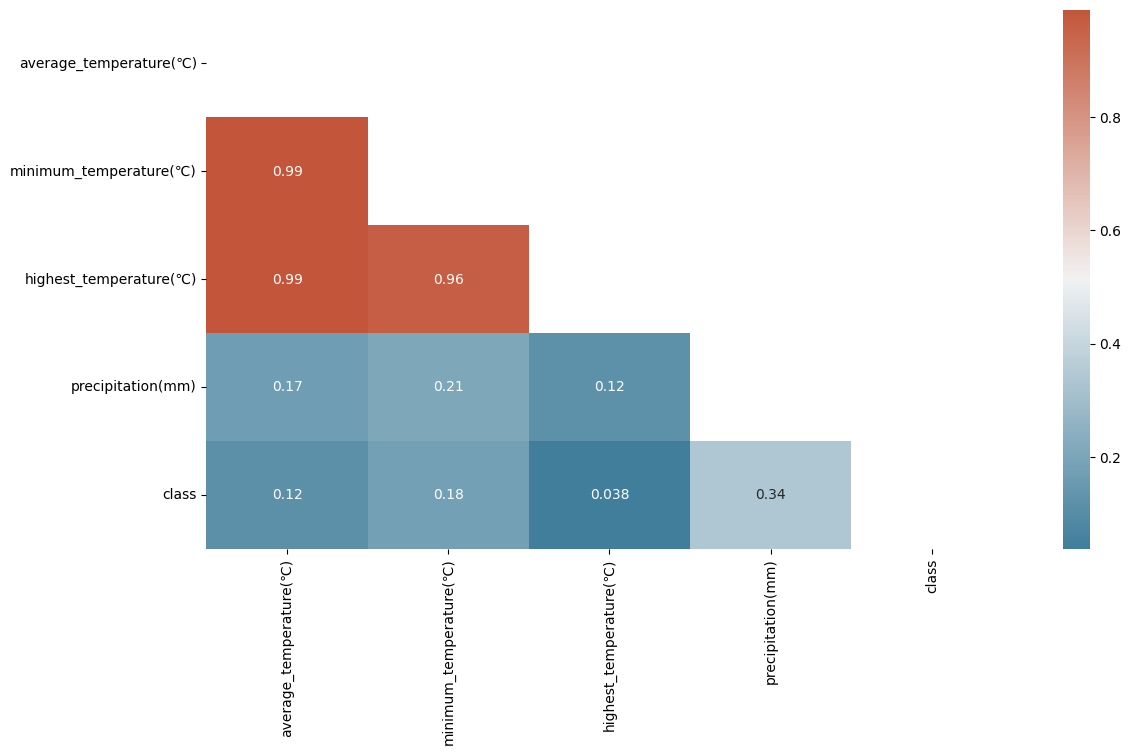

In [26]:
# correlations of variables

import seaborn as sns
corr = seoul.corr()
f, ax = plt.subplots(figsize=(13, 7))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [59]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression

#model = LogisticRegression()
#model.fit(X_train, y_train)
#print('Train accuracy score: ' + str(model.score(X_train, y_train))) #accuracy(정확도)
#print('Test accuracy score:' + str(model.score(X_test, y_test))) #accuracy(정확도)

Train accuracy score: 0.8035034272658035
Test accuracy score:0.8085106382978723


In [64]:
# 랜덤 포레스트 (결정 트리를 기반으로 배깅)

model = RandomForestClassifier() 
model.fit(X_train,y_train)
print('Train accuracy score: ' + str(model.score(X_train, y_train))) #recall
print('Test accuracy score:' + str(model.score(X_test, y_test))) #recall

Train accuracy score: 0.8194973343488196
Test accuracy score:0.7933130699088146


In [65]:
# 11/02 ~ 11/12 날씨 데이터
# 랜덤 포레스트
test2 = pd.DataFrame([[10.5, 0], [4.0, 0], [9.5, 0], [10.5, 0], [13, 0], [9, 0], [6.5, 0], [9.0, 0], [11.0, 0], [12.5, 0], [11, 0],[17,0]], columns=['average_temperature(℃)','precipitation(mm)'])
result = model.predict(test2)
result

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [53]:
a = [16, 6]
np.median(a)

11.0

In [30]:
# 결정트리

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = tree.DecisionTreeClassifier() 
model.fit(X_train, y_train) 

print(model.score(X_train,  y_train))
print(model.score(X_test, y_test))
print('Train accuracy score: ' + str(model.score(X_train, y_train))) #recall
print('Test accuracy score:' + str(model.score(X_test, y_test))) #recall

In [31]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(model)
plt.show()

In [32]:
plt.figure(figsize=(20,10))
plot_tree(model, max_depth=3, filled=True, feature_names=['average_temperature(℃)', 'precipitation(mm)'])
plt.show()

In [61]:
# 랜덤 포레스트 (결정 트리를 기반으로 배깅)

model = RandomForestClassifier() 
model.fit(X_train,y_train)
print('Train accuracy score: ' + str(model.score(X_train, y_train))) #recall
print('Test accuracy score:' + str(model.score(X_test, y_test))) #recall

Train accuracy score: 0.8194973343488196
Test accuracy score:0.790273556231003


In [34]:
# 그레디언트 부스팅 회귀 트리 (결정 트리를 기반으로 부스팅)
# 길이가 얕은 결정 트리를 사용하여 이전 트리의 예측값과 타깃값 사이의 오차를 줄이는 방향으로 새로운 트리를 추가하는 알고리즘
# 과대적합에 강하고 일반적으로 높은 일반화 성능 기대 가능

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate

gb = GradientBoostingClassifier()
scores = cross_validate(gb, X_train, y_train,
                         # return_train_score=True, n_jobs=1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

In [35]:
# XGBoosting (eXtream Gradient Boosting)

from xgboost import XGBClassifier

model = XGBClassifier() 
model.fit(X_train,y_train)
print('Train accuracy score: ' + str(model.score(X_train, y_train))) #recall
print('Test accuracy score:' + str(model.score(X_test, y_test))) #recall

In [36]:
#y_pred = model.predict(X_test)
#predictions = [round(value) for value in y_pred]

In [37]:
#accuracy = accuracy_score(y_test, predictions)
#print("Accuracy : %.2f%%" % (accuracy * 100.0))

In [38]:
#X_test = pd.DataFrame([[11.0, 0],[10.5, 0], [12.0, 0], [12.0, 0], [13.5, 0], [13.0, 0], [11.5, 0]],columns=['온도','강수량'])
#result = model.predict(X_test)
#result

In [39]:
#pip install lightgbm

In [40]:
# lightgbm !!!!

# build the lightgbm model
#import lightgbm as lgb
#clf = lgb.LGBMClassifier()
#clf.fit(X_train, y_train)

In [41]:
# predict the results
#y_pred=clf.predict(X_test)

In [42]:
# view accuracy
#from sklearn.metrics import accuracy_score
#accuracy=accuracy_score(y_pred, y_test)
#print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

In [43]:
#from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score
#from sklearn.metrics import confusion_matrix

#def get_clf_eval(y_test, y_pred):
    #confusion = confusion_matrix(y_test, y_pred)
    #accurary = accuracy_score(y_test, y_pred)
    #precision = precision_score(y_test, y_pred)
    #recall = recall_score(y_test, y_pred)
    #F1 = f1_score(y_test, y_pred)
    #AUC = roc_auc_score(y_test, y_pred)
    
    #print('LIGHTGBM')
    #print('오차행렬 :\n', confusion)
    #print('\n정확도 : {:.4f}'.format(accuracy))
    #print('정밀도 : {:.4f}'.format(precision))
    #print('재현율 : {:.4f}'.format(recall))
    #print('F1 : {:.4f}'.format(F1))
    #print('roc_auc_score : {:.4f}'.format(AUC))

In [44]:
#get_clf_eval(y_test, y_pred)

In [45]:
#y_pred_train = clf.predict(X_train)

In [46]:
#print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

In [47]:
# print the scores on training and test set

#print('lightgbm Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

#print('lightgbm Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

In [48]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred))

In [49]:
#from flask import Flask
#from flask import request